In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
insu = pd.read_csv("D:\\SKILL ENEBLE\\PYTHON\\assignments\\input data\\insurance.csv")
insu.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
from sklearn.cluster import KMeans  

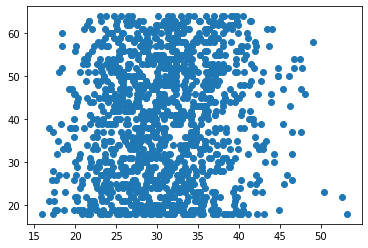

In [53]:
plt.scatter(insu['bmi'],insu['age'], label='True Position')
plt.show()

In [54]:
x=insu.iloc[:,:5].values
y=insu.iloc[:,6].values
print(x[:5])
print(y[:5])

[[19.     0.    27.9    0.     1.   ]
 [18.     1.    33.77   1.     0.   ]
 [28.     1.    33.     3.     0.   ]
 [33.     1.    22.705  0.     0.   ]
 [32.     1.    28.88   0.     0.   ]]
[16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


<Figure size 432x288 with 0 Axes>

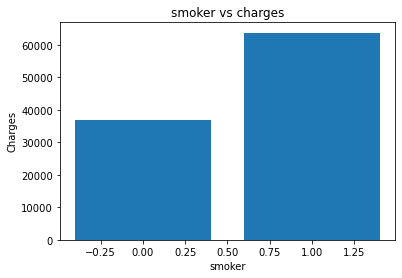

<Figure size 432x288 with 0 Axes>

In [55]:
plt.bar(insu['smoker'],y,)
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.title('smoker vs charges')
plt.figure()

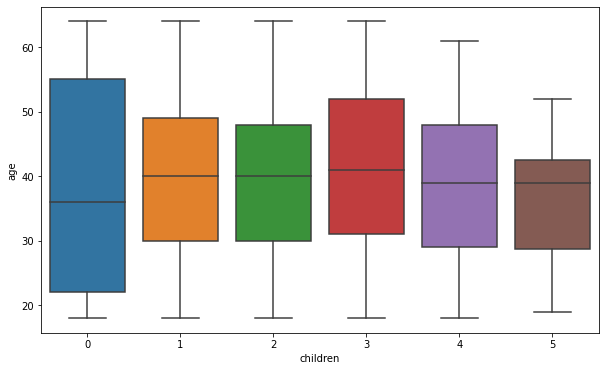

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='children',y='age',data=insu)
plt.show()


<Figure size 1008x576 with 0 Axes>

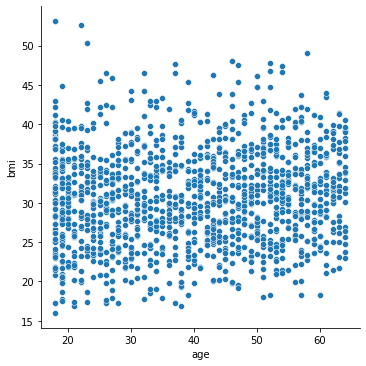

In [56]:
plt.figure(figsize=(14,8))
sns.relplot(x='age',y='bmi',data=insu)
plt.show()

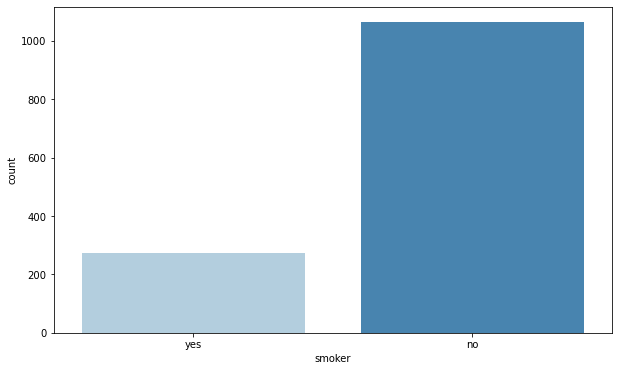

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='smoker',data=insu,palette='Blues')
plt.show()

In [57]:
insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   int64  
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   int64  
 5   region       1338 non-null   int32  
 6   charges      1338 non-null   float64
 7   GenderClass  1338 non-null   int64  
 8   BMI CLASS    1338 non-null   int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 83.8 KB


In [58]:
insu.groupby('sex').mean()

,age,bmi,children,smoker,region,charges,GenderClass,BMI CLASS
sex,,,,,,,,
0,39.503021,30.377749,1.074018,0.173716,1.510574,12569.578844,0.0,0.197885
1,38.917160,30.943129,1.115385,0.235207,1.520710,13956.751178,1.0,0.171598


In [70]:
insu.iloc[:,[0,2,6]]


,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


In [76]:
X = insu.iloc[:,[0,2,6]].values
X

array([[1.90000000e+01, 2.79000000e+01, 1.68849240e+04],
       [1.80000000e+01, 3.37700000e+01, 1.72555230e+03],
       [2.80000000e+01, 3.30000000e+01, 4.44946200e+03],
       ...,
       [1.80000000e+01, 3.68500000e+01, 1.62983350e+03],
       [2.10000000e+01, 2.58000000e+01, 2.00794500e+03],
       [6.10000000e+01, 2.90700000e+01, 2.91413603e+04]])

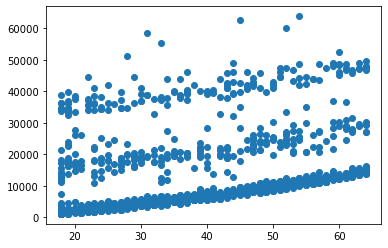

In [79]:
plt.scatter(X[:,0], X[:,2]);


In [98]:
X1 = insu.iloc[:,[0,6]]
X1.head()

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520


In [99]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [100]:
hopkins(X1)


0.9652250702361183

In [101]:
l = []
for i in range(1000):
    l.append(hopkins(X1))
    
print(sum(l)/len(l))

0.9406192575338329


In [102]:
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=2)  
kmeans.fit(X)  
print(kmeans.cluster_centers_)

[[3.84331210e+01 3.02174386e+01 8.36484755e+03]
 [4.27656904e+01 3.27140586e+01 3.58278558e+04]]


In [103]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 1])

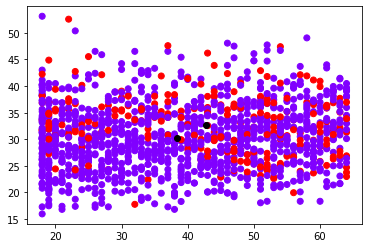

In [104]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black'); 

In [111]:
from sklearn.cluster import KMeans  

kmeans = KMeans(n_clusters=4)  
kmeans.fit(X)  

print(kmeans.cluster_centers_)


[[2.93557522e+01 3.00984602e+01 4.23916778e+03]
 [4.10511364e+01 2.81651136e+01 2.25250204e+04]
 [5.09457014e+01 3.08438009e+01 1.13268814e+04]
 [3.95483871e+01 3.50450000e+01 4.12245808e+04]]


In [112]:
kmeans.labels_

array([2, 0, 0, ..., 0, 0, 1])

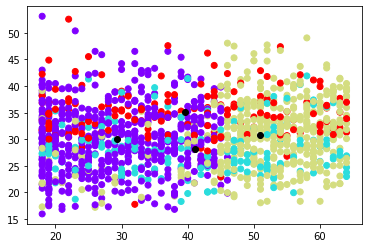

In [113]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black'); 

In [114]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


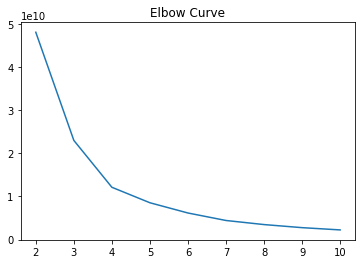

In [115]:
plt.plot(range(2,11), wcss)
plt.title("Elbow Curve")
plt.show()


In [116]:
X1['labels_5'] = kmeans.labels_
X1.head()


,age,charges,labels_5
0,19,16884.92400,2
1,18,1725.55230,6
2,28,4449.46200,0
3,33,21984.47061,2
4,32,3866.85520,6


In [117]:
X1.labels_5.value_counts()


6    282
0    266
8    227
4    217
2    116
7     73
1     54
5     52
3     46
9      5
Name: labels_5, dtype: int64

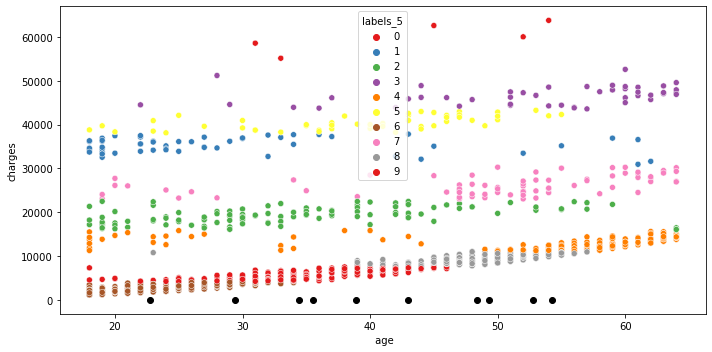

In [119]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='age', y='charges', hue='labels_5', data=X1, palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel(" age")
plt.ylabel("charges")
plt.tight_layout()


In [120]:
X1.columns


Index(['age', 'charges', 'labels_5'], dtype='object')

In [121]:
X1[['age','charges','labels_5']].groupby('labels_5').mean().sort_values(by='charges', ascending=False)


,age,charges
labels_5,,
9,43.000000,60018.235328
3,52.739130,46601.494948
5,38.923077,40456.653442
1,29.407407,35275.301653
7,49.287671,26155.568162
2,34.439655,19301.988173
4,54.294931,12826.003836
8,48.387665,9284.067634
0,35.458647,5810.410664


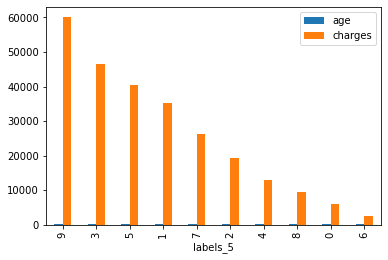

In [123]:
X1[['age','charges','labels_5']].groupby('labels_5').mean().sort_values(by='charges', ascending=False).plot(kind='bar');


In [125]:
c1 = X1[X1['labels_5']==1]
c1


,age,charges,labels_5
19,30,36837.46700,1
23,34,37701.87680,1
30,22,35585.57600,1
53,36,37742.57570,1
57,18,34303.16720,1
82,22,37165.16380,1
103,61,30942.19180,1
128,32,32734.18630,1
158,30,36950.25670,1
161,18,36149.48350,1


In [126]:
c1.labels_5.value_counts()


1    54
Name: labels_5, dtype: int64

In [127]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


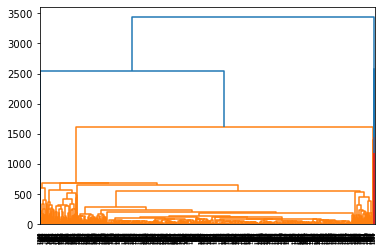

In [128]:
mergings = linkage(X1, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

In [129]:
cut_tree(mergings, n_clusters=5)


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [130]:
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1,)
cluster_labels


array([0, 0, 0, ..., 0, 0, 0])

In [131]:
X1.head()


,age,charges,labels_5
0,19,16884.92400,2
1,18,1725.55230,6
2,28,4449.46200,0
3,33,21984.47061,2
4,32,3866.85520,6


In [132]:
X1['cluster_labels'] = cluster_labels
X1.head()

,age,charges,labels_5,cluster_labels
0,19,16884.92400,2,0
1,18,1725.55230,6,0
2,28,4449.46200,0,0
3,33,21984.47061,2,0
4,32,3866.85520,6,0


In [133]:
X1.labels_5.value_counts().sort_values(ascending=False)


6    282
0    266
8    227
4    217
2    116
7     73
1     54
5     52
3     46
9      5
Name: labels_5, dtype: int64

In [134]:
X1.cluster_labels.value_counts().sort_values(ascending=False)


0    1331
1       2
2       2
3       2
4       1
Name: cluster_labels, dtype: int64

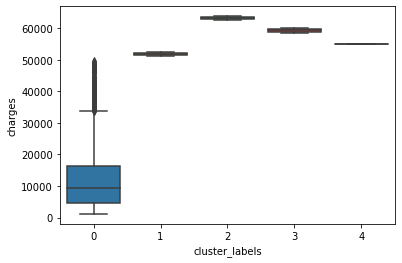

In [135]:
sns.boxplot(x='cluster_labels', y='charges', data=X1);


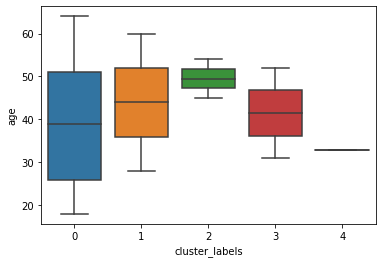

In [137]:

sns.boxplot(x='cluster_labels', y='age', data=X1);


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
insu['sex'] = le.fit_transform(insu['sex'])
insu['smoker'] = le.fit_transform(insu['smoker'])
insu['region'] = le.fit_transform(insu['region'])


In [42]:
insu.head()

,age,sex,bmi,children,smoker,region,charges,GenderClass,BMI CLASS
0,19,0,27.900,0,1,3,16884.92400,0,obese
1,18,1,33.770,1,0,2,1725.55230,1,obese
2,28,1,33.000,3,0,2,4449.46200,1,obese
3,33,1,22.705,0,0,1,21984.47061,1,Non obase
4,32,1,28.880,0,0,1,3866.85520,1,obese


In [22]:
insu.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [25]:
insu['GenderClass'] = insu.apply(lambda x : 'child' if x['age']<15 else x['sex'], axis=1)
insu.head()


,age,sex,bmi,children,smoker,region,charges,GenderClass
0,19,0,27.900,0,1,southwest,16884.92400,0
1,18,1,33.770,1,0,southeast,1725.55230,1
2,28,1,33.000,3,0,southeast,4449.46200,1
3,33,1,22.705,0,0,northwest,21984.47061,1
4,32,1,28.880,0,0,northwest,3866.85520,1


In [34]:
insu['BMI CLASS'] = insu.apply(lambda x : 'Non obese' if x['bmi']<18.5 
                                else x['sex'], axis=1)
insu.head()

,age,sex,bmi,children,smoker,region,charges,GenderClass,BMI CLASS
0,19,0,27.900,0,1,southwest,16884.92400,0,0
1,18,1,33.770,1,0,southeast,1725.55230,1,1
2,28,1,33.000,3,0,southeast,4449.46200,1,1
3,33,1,22.705,0,0,northwest,21984.47061,1,1
4,32,1,28.880,0,0,northwest,3866.85520,1,1


In [43]:
insu['BMI CLASS'] = insu.apply(lambda x : 'Healthy' if x['bmi']<24.9 
                                else x['sex'], axis=1)
insu.head()

,age,sex,bmi,children,smoker,region,charges,GenderClass,BMI CLASS
0,19,0,27.900,0,1,3,16884.92400,0,0
1,18,1,33.770,1,0,2,1725.55230,1,1
2,28,1,33.000,3,0,2,4449.46200,1,1
3,33,1,22.705,0,0,1,21984.47061,1,Healthy
4,32,1,28.880,0,0,1,3866.85520,1,1


In [44]:
insu['BMI CLASS'] = insu.apply(lambda x : ' obese' if x['bmi']>25
                                else 'Non obase', axis=1)
insu.head()

,age,sex,bmi,children,smoker,region,charges,GenderClass,BMI CLASS
0,19,0,27.900,0,1,3,16884.92400,0,obese
1,18,1,33.770,1,0,2,1725.55230,1,obese
2,28,1,33.000,3,0,2,4449.46200,1,obese
3,33,1,22.705,0,0,1,21984.47061,1,Non obase
4,32,1,28.880,0,0,1,3866.85520,1,obese


In [46]:
le = LabelEncoder()
insu['BMI CLASS'] = le.fit_transform(insu['BMI CLASS'])

In [47]:
from sklearn.cluster import KMeans  

# Create Clusters. Assume with no. of clusters = 2
kmeans = KMeans(n_clusters=2)  
kmeans.fit(insu)  

# see what centroid values the algorithm generated for the final clusters 
print(kmeans.cluster_centers_)

[[4.27656904e+01 5.73221757e-01 3.27140586e+01 1.16736402e+00
  7.99163180e-01 1.51882845e+00 3.58278558e+04 5.73221757e-01
  9.62343096e-02]
 [3.84331210e+01 4.90445860e-01 3.02174386e+01 1.07916288e+00
  7.55232029e-02 1.51501365e+00 8.36484755e+03 4.90445860e-01
  2.03821656e-01]]


In [48]:
kmeans.labels_


array([1, 1, 1, ..., 1, 1, 0])

In [49]:
plt.scatter(insu[:,0],insu[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black');

TypeError: '(slice(None, None, None), 0)' is an invalid key